In [1]:
import os
import matplotlib.pyplot as plt
import IPython.display as display
import pickle

# Base path where your images are stored
image_base_path = '../Figures/halo_check_images'

# Assuming all your images are in a single folder and follow the 'simr431h1.png' naming convention
image_files = [f for f in os.listdir(image_base_path) if f.endswith('.png')]

# Prepare an empty dictionary for classifications
halo_types_dict = {}

def classify_halo(image_path):
    """
    Displays the image for classification.
    This function should be adapted based on your interactive environment.
    """
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # For a script, this would be manual classification,
    # but in an interactive environment like Jupyter Notebook,
    # you could use input() to classify each image.
    classification = input("Enter classification (Central, Backsplash, Satellite): ")
    return classification

# Iterate through each image file
for image_file in image_files:
    # Extract simulation and halo ID from the filename
    parts = image_file.split('h')
    simulation_id = parts[0]  # e.g., 'simr431'
    halo_id = parts[1].split('.')[0]  # e.g., '1'

    image_path = os.path.join(image_base_path, image_file)

    # Call the function to display the image and classify
    classification = classify_halo(image_path)

    # Store the classification in the dictionary
    if simulation_id not in halo_types_dict:
        halo_types_dict[simulation_id] = {}
    halo_types_dict[simulation_id][halo_id] = classification

    # Clear the output to prepare for the next image
    display.clear_output(wait=True)

# Once classification is done, convert the dictionary to the format expected by 'HaloTypes.txt'
with open('HaloTypes.txt', 'w') as file:
    file.write("SimulationID\tHaloID\tType\n")  # Writing header
    for sim, halos in halo_types_dict.items():
        for hid, type in halos.items():
            file.write(f"{sim}\t{hid}\t{type}\n")

print("Classification completed and saved to HaloTypes.txt.")


FileNotFoundError: [Errno 2] No such file or directory: '../Figures/halo_check_images'

In [7]:
#import BWMDC sims from ../PickleFiles/SimulationInfo.pickle
import pickle
import pynbody
with open('../PickleFiles/SimulationInfo.MerianCDM.pickle', 'rb') as f:
    sims = pickle.load(f)
#open sim 'cptmarvel' and load halo catalog
sim = sims['r431']

s = pynbody.load(sim['path'])
s.physical_units()

pynbody.snapshot.tipsy : Loading /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096


In [8]:

h = s.halos()



pynbody.snapshot.tipsy : Attempting to load auxiliary array /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096.amiga.grp


In [9]:
halo = h[1]

In [36]:
pynbody.analysis.halo.center(halo, mode='hyb')
rvir = pynbody.analysis.halo.virial_radius(halo,overden=178)
print(rvir)

pynbody.analysis._com : Initial rough COM=[-0.00604414  0.01859719 -0.03371759]
pynbody.analysis.halo : Final SSC=[ 2.07147071e-13 -5.16958438e-15 -1.20242358e-14]
pynbody.analysis.halo : Finding halo velocity center...
pynbody.analysis.halo : vcen=[ 1.61617195e-12 -1.21437145e-13 -8.83307160e-13]
pynbody.analysis.halo : target_rho=7001.256566624509
pynbody.snapshot.tipsy : Attempting to load auxiliary array /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096.r
pynbody.snapshot.tipsy : Attempting to load auxiliary array /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096.r
pynbody.snapshot.simsnap : Deriving array r
pynbody.util : Entering bisection search algorithm
pynbody.util : 0.000000 121.789612 243.579224 -5946.303188
pynbody.util : 121.789612 182.684418 243.579224 3161.080617
pynbody.util : 121.789612 152.237015 182.684418 365.432525

149.50150598483938


In [28]:
rvir2 = halo.all_keys()

In [43]:
rvir2 = h[1].properties.keys()

print(rvir2)

dict_keys(['omegaM0', 'omegaL0', 'h', 'boxsize', 'a', 'time', 'halo_id'])


In [38]:
# read ../../Data/cptmarvel.BWMDC.3DShapes.pickle
import pickle
import numpy as np
with open('../../Data/elektra.BWMDC.3DShapes.pickle', 'rb') as f:
    shapes = pickle.load(f)
    print(shapes.keys())
    for i in shapes:
        halo = shapes[i]
        #print(halo)
        N = halo['N_s']
        #print(N)
        print(halo.keys())
        #if np.sum(N ) < 10000:
        print(i)
        print(np.sum(N))
    

dict_keys([1, 2, 3, 4, 5, 9, 10])
dict_keys(['rbins', 'ba', 'ca', 'rotations', 'N_s', 'r_80', 'ba_smooth', 'ca_smooth', 'diffs_at_Reff'])
1
850104
dict_keys(['rbins', 'ba', 'ca', 'rotations', 'N_s', 'r_80', 'ba_smooth', 'ca_smooth', 'diffs_at_Reff'])
2
263354
dict_keys(['rbins', 'ba', 'ca', 'rotations', 'N_s', 'r_80', 'ba_smooth', 'ca_smooth', 'diffs_at_Reff'])
3
137284
dict_keys(['rbins', 'ba', 'ca', 'rotations', 'N_s', 'r_80', 'ba_smooth', 'ca_smooth', 'diffs_at_Reff'])
4
228052
dict_keys(['rbins', 'ba', 'ca', 'rotations', 'N_s', 'r_80', 'ba_smooth', 'ca_smooth', 'diffs_at_Reff'])
5
141707
dict_keys(['rbins', 'ba', 'ca', 'rotations', 'N_s', 'r_80', 'ba_smooth', 'ca_smooth', 'diffs_at_Reff'])
9
13339
dict_keys(['rbins', 'ba', 'ca', 'rotations', 'N_s', 'r_80', 'ba_smooth', 'ca_smooth', 'diffs_at_Reff'])
10
4014


5

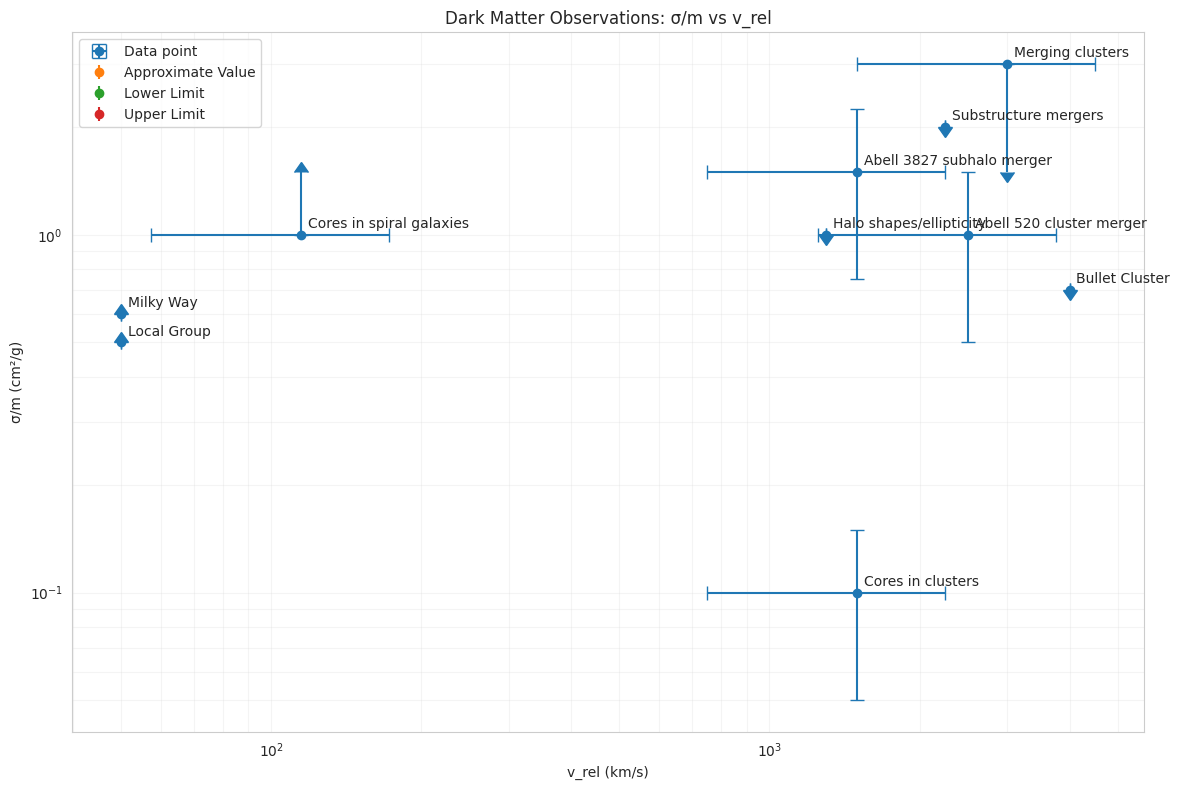

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Format: (name, sigma/m, v_rel, limit_type, is_approximate)
# limit_type: 0 for no limit, 1 for lower limit, -1 for upper limit
observations = [
    ("Cores in spiral galaxies", 1, 115, 1, True),
    ("Milky Way", 0.6, 50, 1, False),
    ("Local Group", 0.5, 50, 1, False),
    ("Cores in clusters", 0.1, 1500, 0, True),
    ("Abell 3827 subhalo merger", 1.5, 1500, 0, True),
    ("Abell 520 cluster merger", 1, 2500, 0, True),
    ("Halo shapes/ellipticity", 1, 1300, -1, False),
    ("Substructure mergers", 2, 2250, -1, False),
    ("Merging clusters", 3, 3000, -1, True),
    ("Bullet Cluster", 0.7, 4000, -1, False)
]

# Separate data
x = np.array([obs[2] for obs in observations])
y = np.array([obs[1] for obs in observations])
labels = [obs[0] for obs in observations]
limits = np.array([obs[3] for obs in observations])
approx = np.array([obs[4] for obs in observations])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate errors for approximate values
xerr = np.where(approx, 0.5 * x, 0)
yerr = np.where(approx, 0.5 * y, 0)

# Create masks for upper and lower limits
uplims = limits == -1
lolims = limits == 1

# add plots 

# Plot points with error bars
ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', capsize=5, 
            uplims=uplims, lolims=lolims, label='Data point')

# Add labels to each point
for i, label in enumerate(labels):
    ax.annotate(label, (x[i], y[i]), xytext=(5, 5), textcoords='offset points')

# Set scales to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('v_rel (km/s)')
ax.set_ylabel('σ/m (cm²/g)')
ax.set_title('Dark Matter Observations: σ/m vs v_rel')

# Add a grid
ax.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
ax.errorbar([], [], yerr=1, fmt='o', capsize=5, label='Approximate Value')
ax.errorbar([], [], yerr=1, fmt='o', lolims=True, capsize=5, label='Lower Limit')
ax.errorbar([], [], yerr=1, fmt='o', uplims=True, capsize=5, label='Upper Limit')
ax.legend()



# Show the plot
plt.tight_layout()
plt.show()

In [21]:
print(r[10:20])

[1.26229512 1.29382527 1.3232602  1.351585   1.38552564 1.41613261
 1.44824478 1.48464461 1.51882748 1.55368081]
